In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Step 2: Data Loading and Inspection.

In [3]:
!git clone https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset.git

fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.


In [4]:
titanic_ds = pd.read_csv("Titanic-Dataset.csv")
print(titanic_ds.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(titanic_ds.tail())

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [6]:
#Concise summary
print(titanic_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
#Get description for numerical data
print(titanic_ds.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Step:3 Data Cleaning
-Missing Value
->Numerical Data: Skewed Distribution(eg.Age & Fare)
->Categorical Data: Fill with Mode
->High Cardinality Too many missing values: For columns like Cabin

In [8]:
titanic_ds['Cabin'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

Missing Values

In [9]:
print("Missing Values before Cleaning:")
titanic_ds.isna().sum()

Missing Values before Cleaning:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic_ds.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
median = titanic_ds['Age'].median()
print(median)

28.0


In [12]:
#Handle missing Age values
#We use median age distribution can be skewed
median_age = titanic_ds['Age'].median()
titanic_ds['Age'] = titanic_ds['Age'].fillna(median_age)

print("Missing values after Cleaning:")
print(titanic_ds[['Age','Embarked','Cabin']].isna().sum())

Missing values after Cleaning:
Age           0
Embarked      2
Cabin       687
dtype: int64


In [13]:
mode = titanic_ds['Embarked'].mode()[0]
print(mode)

S


In [14]:
#Handled Missing Embarked values
mode_embark = titanic_ds['Embarked'].mode()[0]
titanic_ds['Embarked'] = titanic_ds['Embarked'].fillna(mode_embark)

print("Missing values after Embarked cleaning")
print(titanic_ds[['Age','Embarked','Cabin']].isna().sum())


Missing values after Embarked cleaning
Age           0
Embarked      0
Cabin       687
dtype: int64


In [15]:
#Handle the Cabin column
#With over 77% missing data
titanic_ds['Has_Cabin'] = titanic_ds['Cabin'].notna().astype(int) # True is has Cabin False if not
titanic_ds.drop('Cabin', axis= 1,inplace=True)

In [16]:
titanic_ds['Has_Cabin'].value_counts


<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Has_Cabin, Length: 891, dtype: int32>

In [17]:
print("Missing Values after Cleaning")
titanic_ds.isna().sum()

Missing Values after Cleaning


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

Step 4:Univariate Analysis--> Analyze each variables independently
-Numerical: Histograms, Kernel Density plots,BoxPlots(for central tendency)
-Catagorical: Frequency tables,bar charts

Analyzing categorical features:


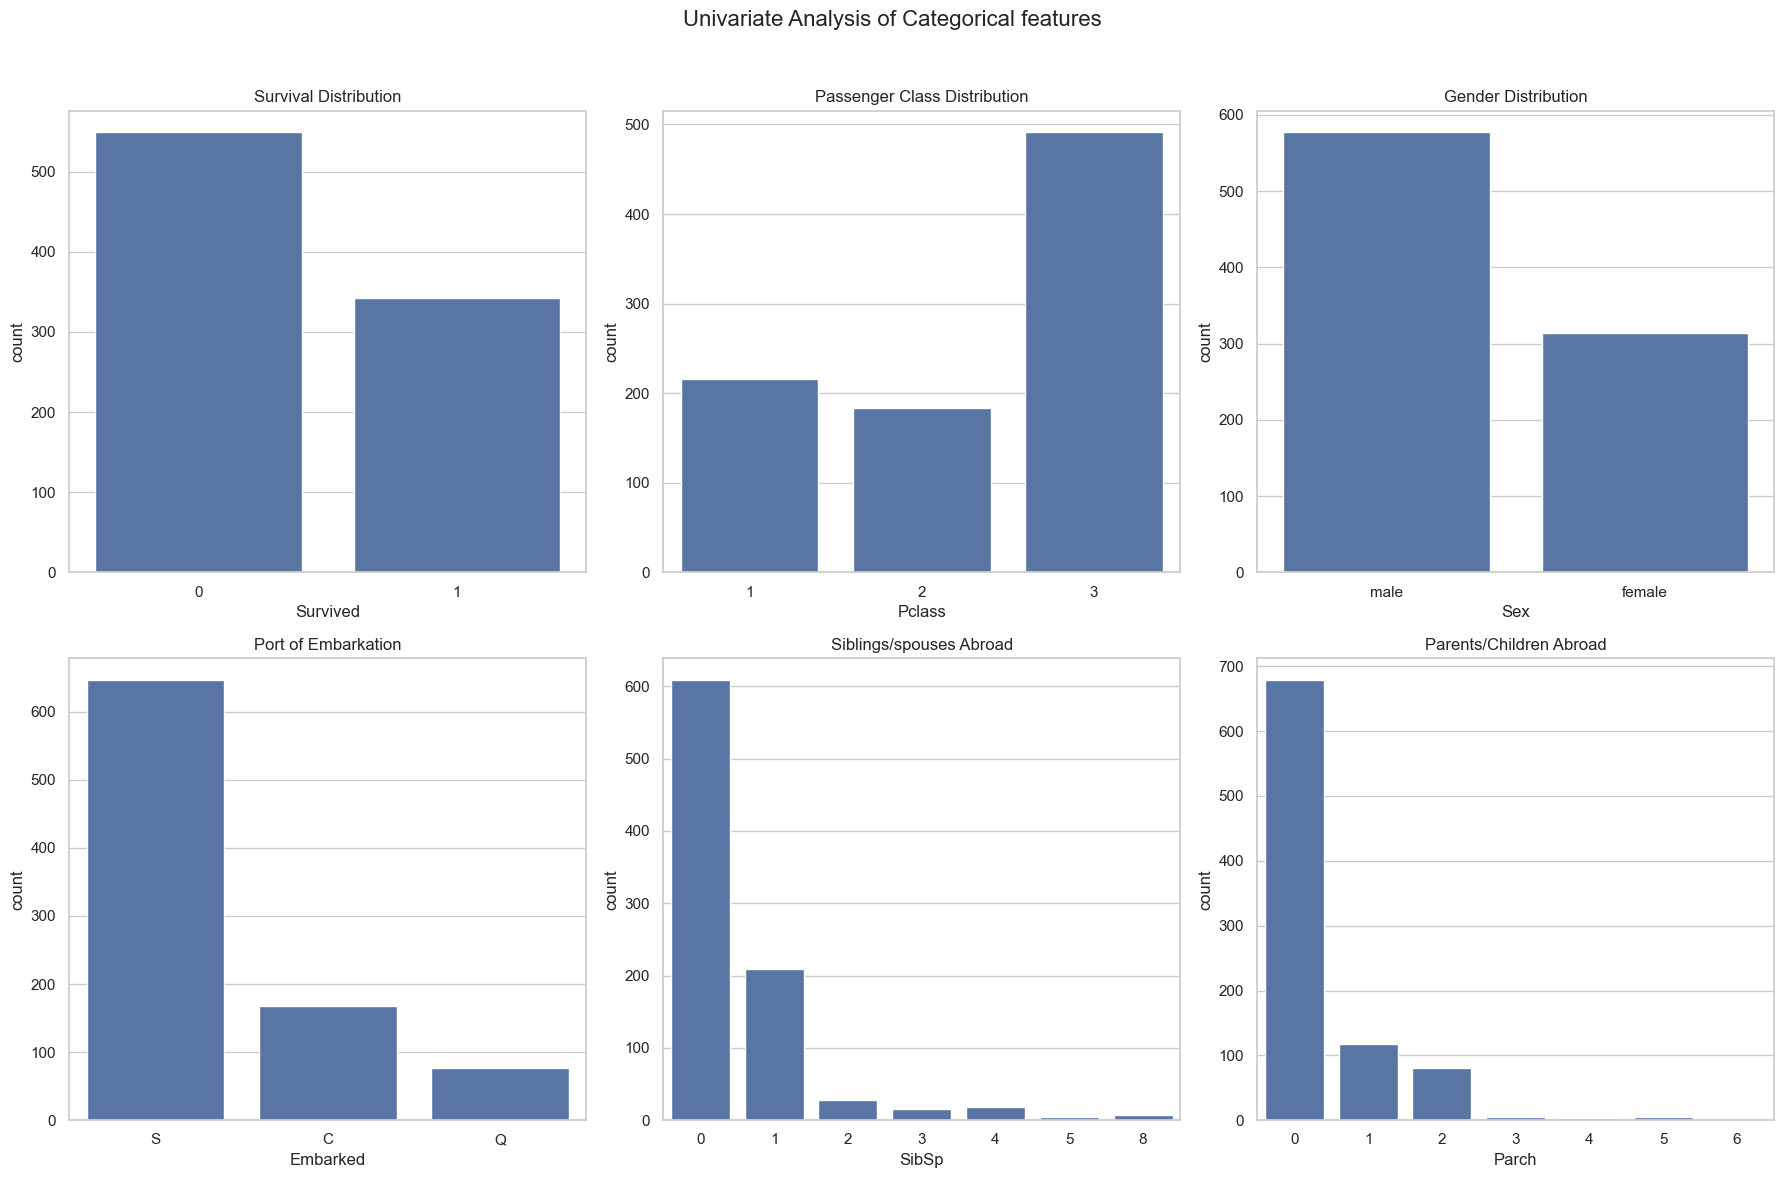

In [18]:
print("Analyzing categorical features:")

fig, axes = plt.subplots(2, 3, figsize=[18,12])
fig.suptitle('Univariate Analysis of Categorical features', fontsize = 16)

#Plotting each one
sns.countplot(ax=axes[0, 0],x='Survived', data = titanic_ds).set_title("Survival Distribution")
sns.countplot(ax=axes[0, 1],x='Pclass', data = titanic_ds).set_title("Passenger Class Distribution")
sns.countplot(ax=axes[0, 2],x='Sex', data = titanic_ds).set_title("Gender Distribution")
sns.countplot(ax=axes[1, 0],x='Embarked', data = titanic_ds).set_title("Port of Embarkation")
sns.countplot(ax=axes[1, 1],x='SibSp', data = titanic_ds).set_title("Siblings/spouses Abroad")
sns.countplot(ax=axes[1, 2],x='Parch', data = titanic_ds).set_title("Parents/Children Abroad")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()











Key Insights:
-Survival->Most people over 500 did not survived
-Pclass-> 3rd class was most populated
-Sex-> More males than females were there
-Embarked-> Majority was embarked from Southampton
-SibSp & Parch-> Most  passengers travelled alone


 Analyzing Numerical Data:


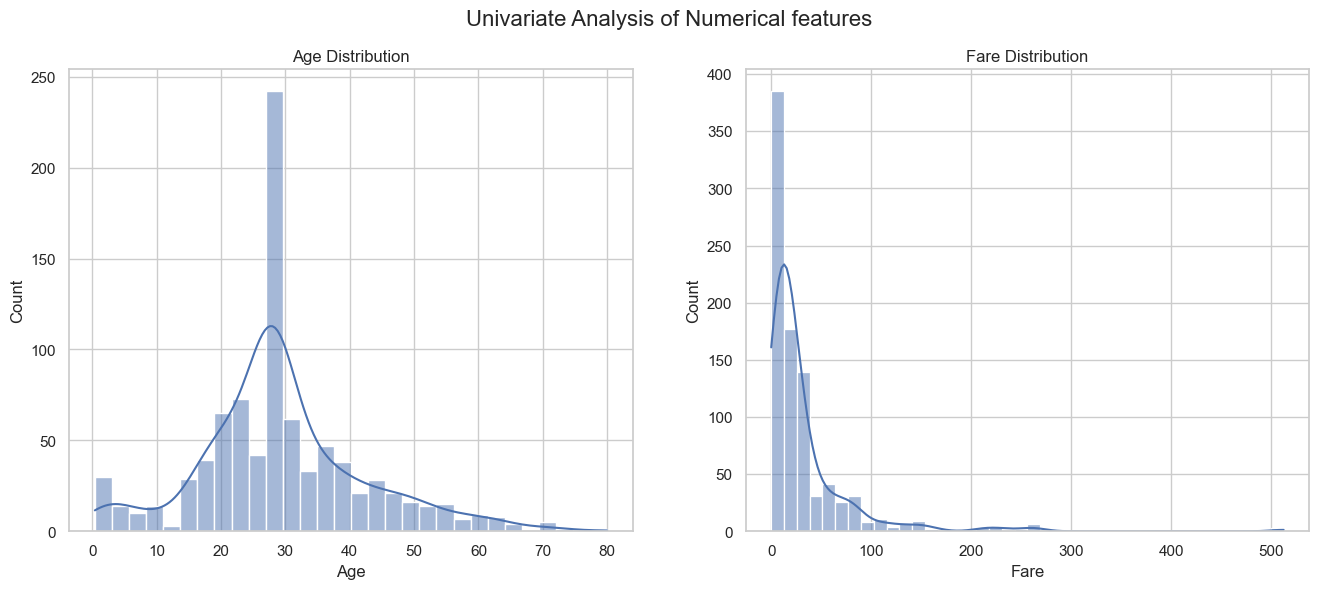

In [19]:
print("\n Analyzing Numerical Data:")

fig, axes = plt.subplots(1, 2, figsize=[16,6])
fig.suptitle('Univariate Analysis of Numerical features', fontsize = 16)

sns.histplot(ax=axes[0], data=titanic_ds, x ='Age', kde = True, bins=30).set_title("Age Distribution")
sns.histplot(ax=axes[1], data=titanic_ds, x ='Fare', kde = True, bins=40).set_title("Fare Distribution")

plt.show()



Key Insights:
Age peaks around(20-30)
Fare - heavily rightly skewed

Step 5: Bivariate Analysis--->Relationship between two variables
-Categorical vs Categorical
-Categorical Vs Numerical



Bivariate Analysis of Data


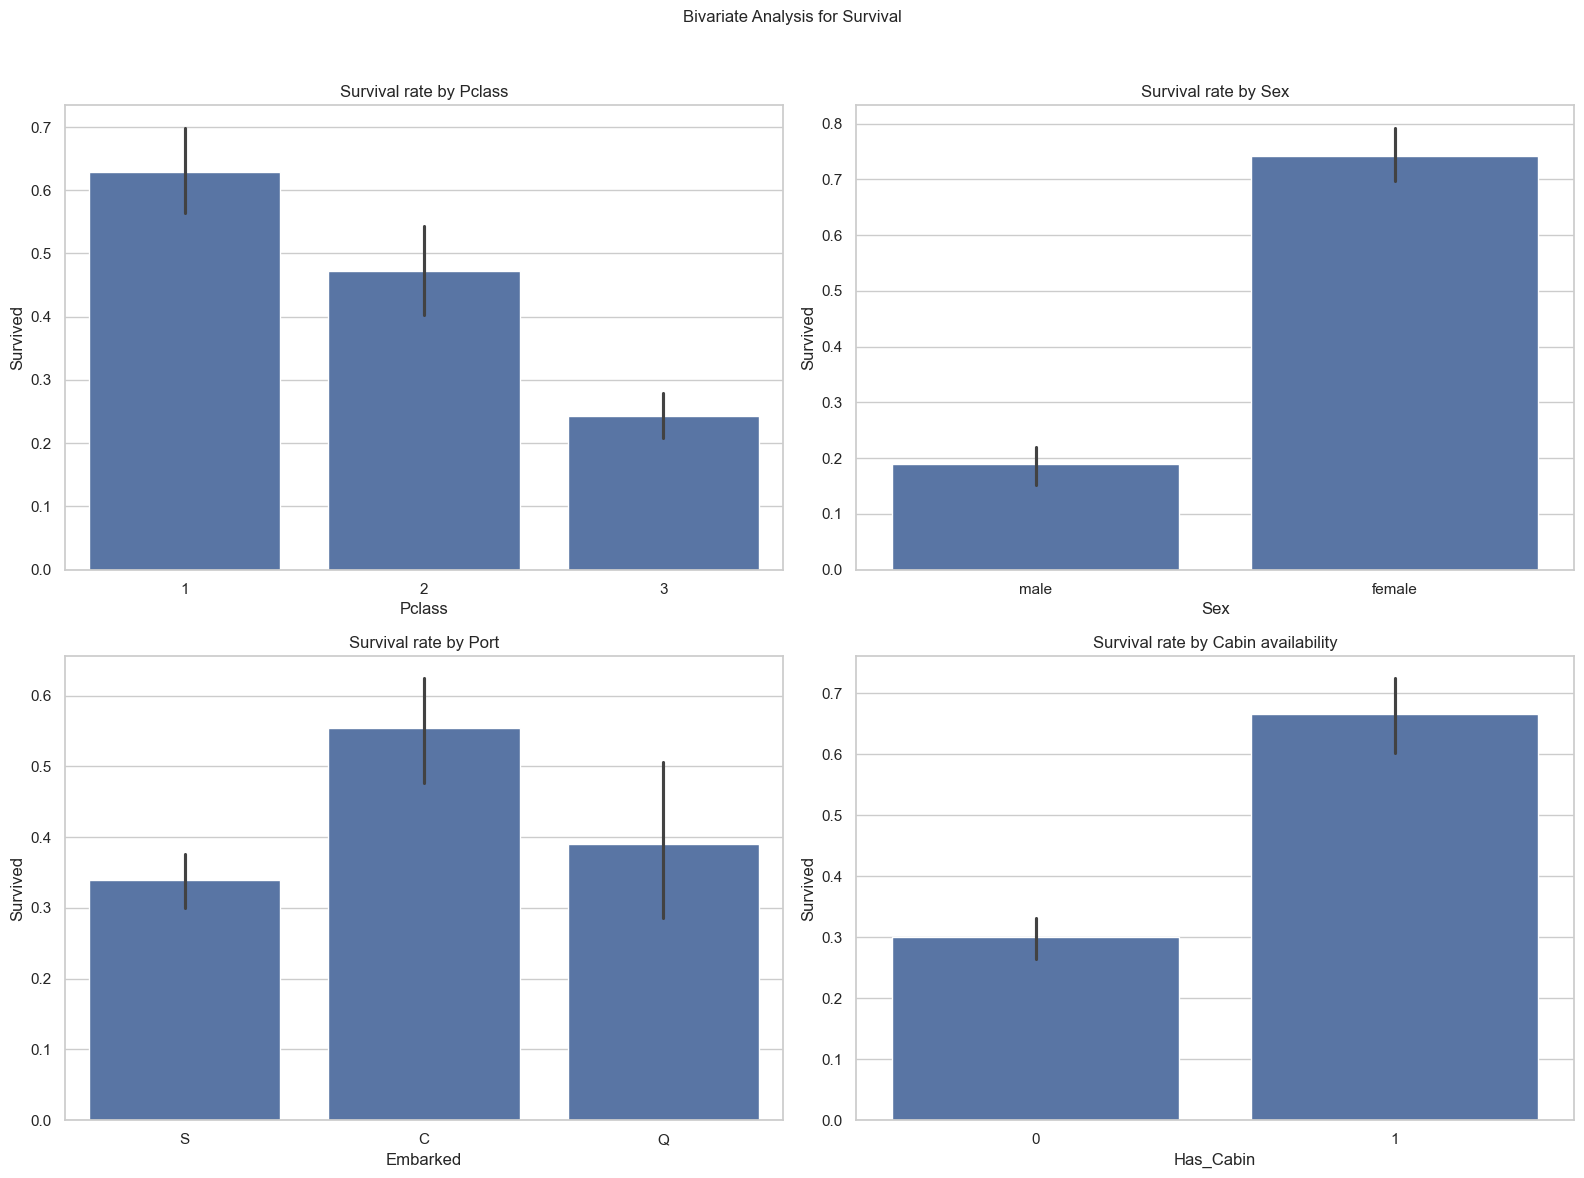

In [20]:
print("Bivariate Analysis of Data")
fig,axes = plt.subplots(2,2, figsize=[16,12])
fig.suptitle('Bivariate Analysis for Survival', fontsize=12)

sns.barplot(ax=axes[0,0], x="Pclass", y="Survived", data=titanic_ds).set_title('Survival rate by Pclass')

sns.barplot(ax=axes[0,1], x="Sex", y="Survived", data=titanic_ds).set_title('Survival rate by Sex')

sns.barplot(ax=axes[1,0], x="Embarked", y="Survived", data=titanic_ds).set_title('Survival rate by Port')

sns.barplot(ax=axes[1,1], x="Has_Cabin", y="Survived", data=titanic_ds).set_title('Survival rate by Cabin availability')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

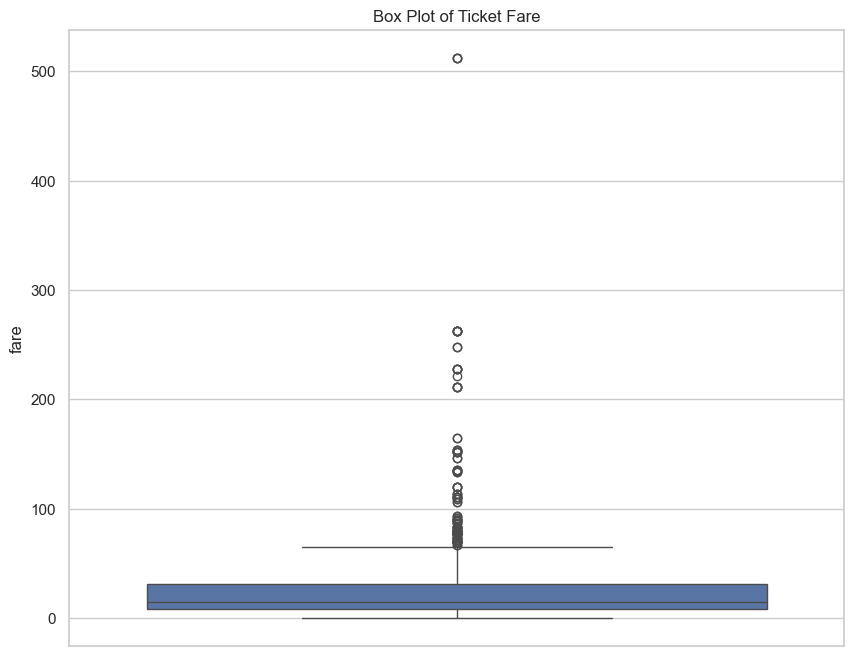

In [21]:
plt.figure(figsize=[10, 8])
sns.boxplot(y='Fare',data=titanic_ds)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('fare')
plt.show()

Feature Engineering : Create new features with existing ones for bigger AI models

->Combining Features: new feature by combing others(SibSp+Parch = Familysize)
->Extracting from Text: Extracting specific info from text
->Binning: Converting a continuous numerical feature  into a categorical feature(binning age into-'Child','Adult','Senior')

In [22]:
#Create Family size
titanic_ds['FamilySize'] = titanic_ds['SibSp'] + titanic_ds['Parch'] + 1

titanic_ds['IsAlone'] = 0
titanic_ds.loc[titanic_ds['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' feature:")
titanic_ds[['FamilySize','IsAlone']].head()

Created 'FamilySize' and 'IsAlone' feature:


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


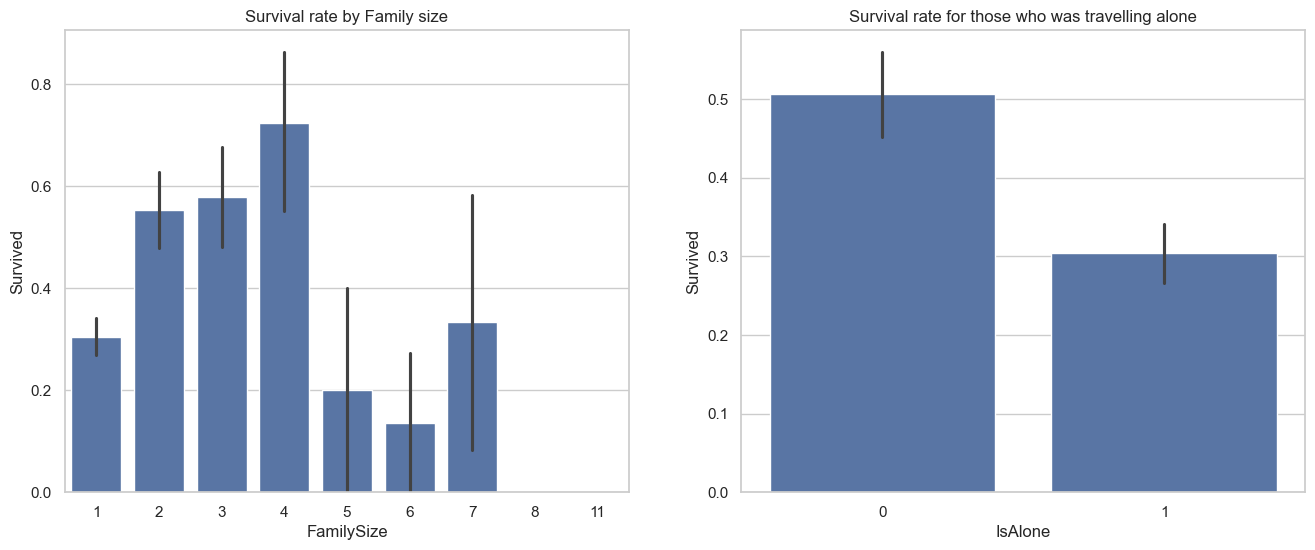

In [23]:
fig, axes = plt.subplots(1, 2, figsize=[16,6])
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=titanic_ds).set_title("Survival rate by Family size" )
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=titanic_ds).set_title("Survival rate for those who was travelling alone" )

plt.show()

In [24]:
titanic_ds['Title'] = titanic_ds['Name'].str.extract(r' ([A-Za-z]+)\.', expand = False)

print("Extrancted Titles:")
titanic_ds['Title'].value_counts()


Extrancted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

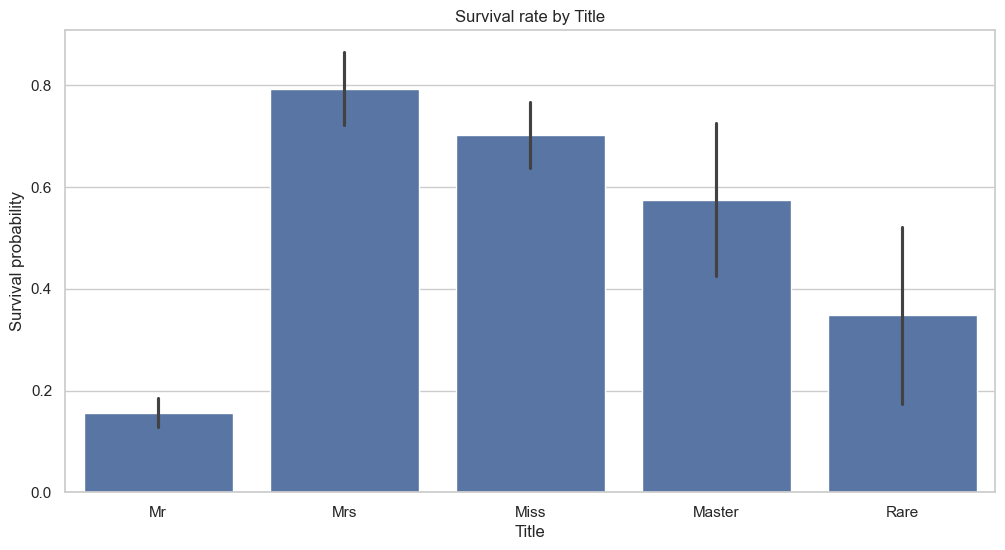

In [25]:
titanic_ds['Title'] = titanic_ds['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')

titanic_ds['Title'] = titanic_ds['Title'].replace('Mlle','Miss')
titanic_ds['Title'] = titanic_ds['Title'].replace('Ms','Miss')
titanic_ds['Title'] = titanic_ds['Title'].replace('Mme','Mrs')

plt.figure(figsize=[12,6])
sns.barplot(x='Title', y='Survived', data = titanic_ds)
plt.title('Survival rate by Title')
plt.ylabel('Survival probability')
plt.show()

Multivariate Analysis

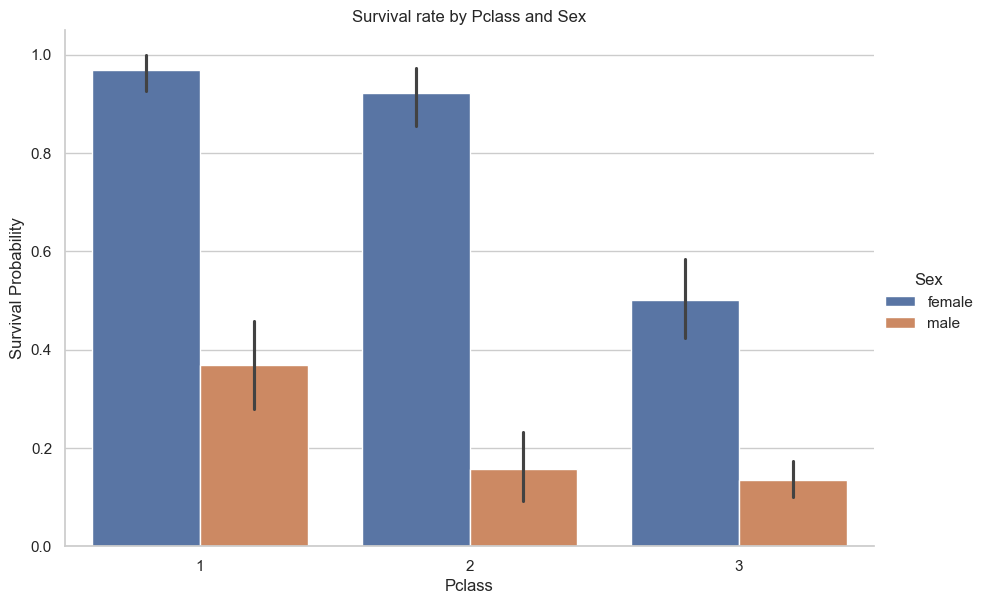

In [26]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_ds,kind = 'bar',height=6, aspect=1.5)
plt.title('Survival rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

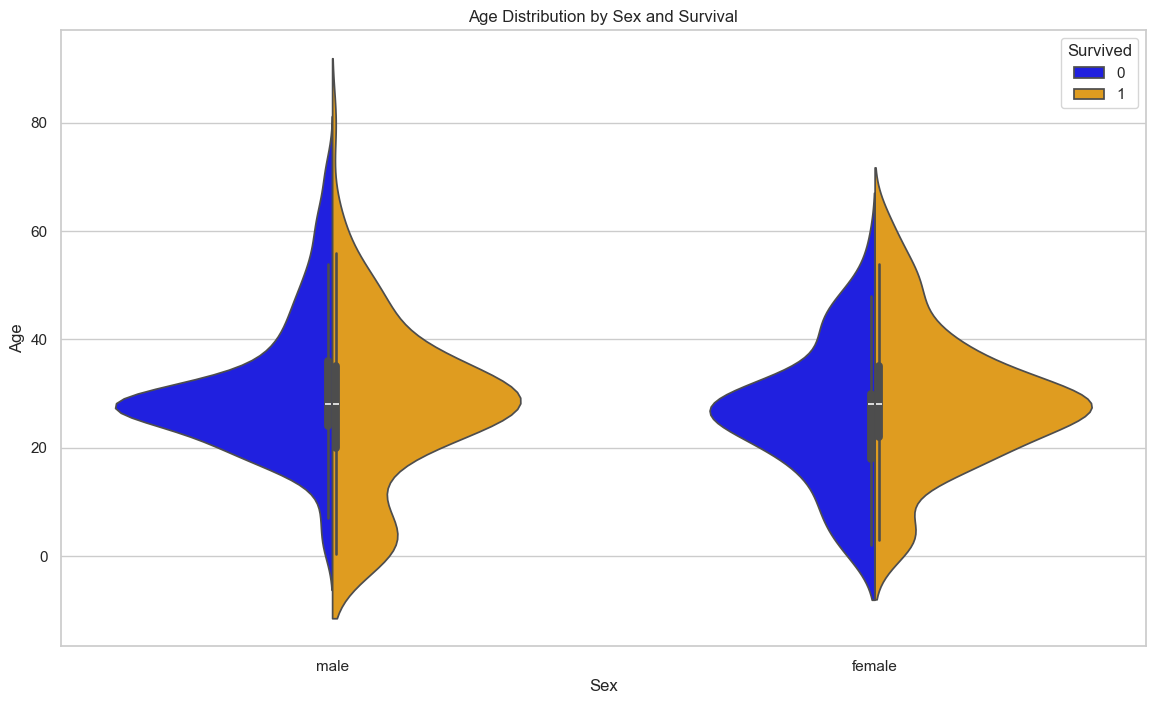

In [27]:
plt.figure(figsize=[14, 8])
sns.violinplot(x='Sex', y='Age', hue='Survived', data = titanic_ds, split = True, palette={0: 'blue', 1:'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

Correlation Analysis:

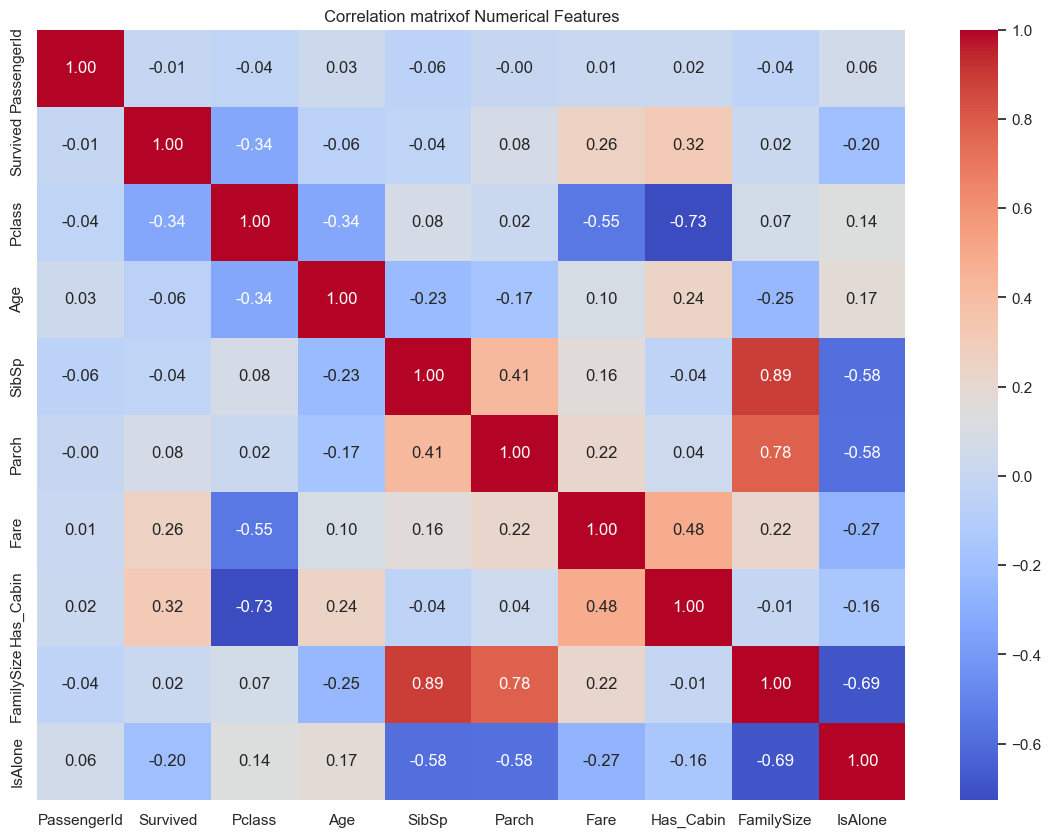

In [28]:
plt.figure(figsize=(14, 10))
numeric_columns = titanic_ds.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation matrixof Numerical Features')
plt.show()

In [32]:
profile = ProfileReport(titanic_ds, title="Titanic Dataset Profiling Report", explorative=True)

In [33]:
profile.to_file("report.html")

Summarize dataset:  77%|███████▋  | 17/22 [00:00<00:00, 38.49it/s, Calculate auto correlation]  c:\Users\91808\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 9 0 9 0 0 9 0 0 0 9 9 0 0 0 0 0 0 0 0 0 9 0 9 0 0 0 9 0 0 0 9 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 9 9 0 0 0 0 0 9 9 0 0 0 9 0 0 0 0 0 0 0
 0 9 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 9 0 0 0 9 9 0 0 0 0 9 0 0 0 0 0 0 0 9
 0 0 0 0 0 0 0 9 0 0 0 0 9 9 0 0 0 9 0 0 0 0 0 0 0 9 9 0 9 0 0 0 0 0 0 0 0
 9 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 9 0 0 0 9 0 0 9 0 0 0 0 0 9 0
 9 0 0 0 0 0 0 0 9 9 9 0 0 0 0 0 0 0 0 0 9 0 0 0 9 0 0 0 0 0 9 0 0 9 0 0 0
 0 0 9 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 9 0 0 9 9 0 0 0 0 9 0
 0 0 0 9 9 0 0 0 0 9 9 0 0 0 9 0 9 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 9 9 0 0 0
 0 9 9 9 0 0 0 9 0 9 0 9 0 9 9 9 0 0 0 0 0 0 9 9 0 0 0 0 0 